# data preprocessing
This class did 2 things:

1.read & normalize the images, store them into a list.

2.read the label information from xml annotation file, convert the information into our required shape [num_samples, width, height, channels]. Since we split each image into 7*7 cells and each cells contain boxes, the width and height here represents the location of cell. the shape of chennels is [5+num_classes] which represents the location information of the ground truth box and the class information.


In [ ]:
import cv2
import numpy as np
import os
from xml.etree import cElementTree as ET
import math
import torchvision
import matplotlib.pyplot as plt


class data_preprocessing:
    def __init__(self, data_path, annotation_path, cls=3, target_image_size=448, cell_size=7):
        self.data_path = data_path
        self.annotation_path = annotation_path
        self.cell_size = cell_size  # the number of cells we want to split an image into
        self.target_image_size = target_image_size
        self.num_cls = cls

    def load_image(self, image_path):
        img = cv2.imread(image_path)  # read image
        img = cv2.resize(img, (self.target_image_size, self.target_image_size))
        return img/255

    def image_prepare(self):
        data = os.listdir(self.data_path)
        data_set = []
        data.sort()
        for filename in data:
            img = self.load_image(os.path.join(self.data_path, filename))
            data_set.append(img)
        return data_set

    def load_annotation(self, annotation_obj):
        data = np.array(os.listdir(self.data_path))
        original_data_size = cv2.imread(os.path.join(self.data_path, data[0])).shape
        height_ratio = original_data_size[0] / self.target_image_size
        width_ratio = original_data_size[1] / self.target_image_size
        # the label for training, the shape is (cell_size, cell_size, )
        label = np.zeros((self.cell_size, self.cell_size,
                          5 + self.num_cls))  # 1 confidence value + 4 position info + number of classes
        annotation_path = os.path.join(self.annotation_path, annotation_obj)
        tree = ET.parse(annotation_path)
        objs = tree.findall('object')
        for obj in objs:
            bbox = obj.find('bndbox')
            x_min = float(bbox.find('xmin').text)
            x_max = float(bbox.find('xmax').text)
            y_min = float(bbox.find('ymin').text)
            y_max = float(bbox.find('ymax').text)
            # calculate the center of this image
            x_center = (x_min + x_max) / 2
            y_center = (y_min + y_max) / 2
            width = x_max - x_min
            height = y_max - y_min
            # to determine which grid cell the center point locate at
            x_cell = int(x_center * self.cell_size / self.target_image_size)
            y_cell = int(y_center * self.cell_size / self.target_image_size)
            # if the center is out of bound, set the limit
            if x_cell > 6:
                x_cell = 6
            if y_cell > 6:
                y_cell = 6
            if label[x_cell, y_cell, 4] == 1:
                continue
            label[x_cell, y_cell, 4] = 1
            bndbox_new = [x_center, y_center, width, height]
            label[x_cell, y_cell, 0:4] = bndbox_new
            # we have three classes in total, with_mask, without_mask and mask_weared_incorrect.
            cls2index = {'with_mask': 1, 'without_mask': 2,
                         'mask_weared_incorrect': 3}
            # find the according class for the bounding box
            cls_info = cls2index[obj.find('name').text.lower().strip()]
            label[x_cell, y_cell, 5 + cls_info - 1] = 1
        return label

    def annotation_prepare(self):
        annotation_list = os.listdir(self.annotation_path)
        labels = []
        annotation_list.sort()
        print(annotation_list)
        for annotation_obj in annotation_list:
            label = self.load_annotation(annotation_obj)
            labels.append(label)
        return np.array(labels)

    def one_stop(self):
        data = np.array(self.image_prepare())
        labels = np.array(self.annotation_prepare())
        print('shape of the data :{}'.format(data.shape))
        print('shape of the label :{}'.format(labels.shape))
        return data, labels

    # def draw_box(self, img_name, labels):
    #     img = cv2.imread(self.data_path + "JPEGImages/" + img_name)
    #     h, w = img.shape[:2]
    #     for label in labels:
    #         label = label.split(' ')
    #         label = [float(x.strip()) for x in label]
    #         pt1 = (int(label[1] * w - label[3] * w / 2), int(label[2] * h - label[4] * h / 2))
    #         pt2 = (int(label[1] * w + label[3] * w / 2), int(label[2] * h + label[4] * h / 2))
    #         cv2.putText(img, CLASSES[int(label[0])], pt1, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))
    #         cv2.rectangle(img, pt1, pt2, (0, 0, 255, 2))
    #     cv2.imshow("img", img)
    #     cv2.waitKey(0)

# Test data preparation result

In [ ]:
test = data_preprocessing(data_path="/content/images_train",annotation_path="/content/annotations_train")
data, labels = test.one_stop()

['maksssksksss0.xml', 'maksssksksss1.xml', 'maksssksksss10.xml', 'maksssksksss100.xml', 'maksssksksss101.xml', 'maksssksksss102.xml', 'maksssksksss103.xml', 'maksssksksss104.xml', 'maksssksksss105.xml', 'maksssksksss106.xml', 'maksssksksss107.xml', 'maksssksksss108.xml', 'maksssksksss109.xml', 'maksssksksss11.xml', 'maksssksksss110.xml', 'maksssksksss111.xml', 'maksssksksss112.xml', 'maksssksksss113.xml', 'maksssksksss114.xml', 'maksssksksss115.xml', 'maksssksksss116.xml', 'maksssksksss117.xml', 'maksssksksss118.xml', 'maksssksksss119.xml', 'maksssksksss12.xml', 'maksssksksss120.xml', 'maksssksksss121.xml', 'maksssksksss122.xml', 'maksssksksss123.xml', 'maksssksksss124.xml', 'maksssksksss125.xml', 'maksssksksss126.xml', 'maksssksksss127.xml', 'maksssksksss128.xml', 'maksssksksss129.xml', 'maksssksksss13.xml', 'maksssksksss130.xml', 'maksssksksss131.xml', 'maksssksksss132.xml', 'maksssksksss133.xml', 'maksssksksss134.xml', 'maksssksksss135.xml', 'maksssksksss136.xml', 'maksssksksss137.x

In [ ]:
labels[7]

array([[[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
        [ 54. , 124.5,  24. ,  31. ,   1. ,   0. ,   1. ,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ]],

       [[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
        [ 89.5,  90.5,  13. ,  11. ,   1. ,   0. ,   1. ,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
        [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ]],

       [[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
      

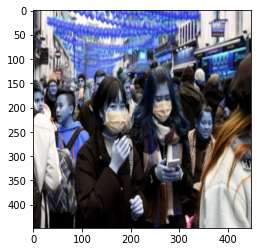

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data[7])

# mask dataset
To prepare the dataset class for pytorch data loader

In [ ]:
from torch.utils.data import Dataset
import torchvision


class mask_data_set(Dataset):
    def __init__(self, is_train=True):
        if is_train:
            self.dataset = data_preprocessing('/content/images_train','/content/annotations_train')
            self.image, self.label = self.dataset.one_stop()
        else:
            self.dataset = data_preprocessing('/content/images_val','/content/annotations_val')
            self.image, self.label = self.dataset.one_stop()

    def __len__(self):
        return len(self.image)

    def __getitem__(self, item):
        return torchvision.transforms.ToTensor()(self.image[item]), torchvision.transforms.ToTensor()(self.label[item])

In [ ]:
dataset = mask_data_set()

['maksssksksss0.xml', 'maksssksksss1.xml', 'maksssksksss10.xml', 'maksssksksss100.xml', 'maksssksksss101.xml', 'maksssksksss102.xml', 'maksssksksss103.xml', 'maksssksksss104.xml', 'maksssksksss105.xml', 'maksssksksss106.xml', 'maksssksksss107.xml', 'maksssksksss108.xml', 'maksssksksss109.xml', 'maksssksksss11.xml', 'maksssksksss110.xml', 'maksssksksss111.xml', 'maksssksksss112.xml', 'maksssksksss113.xml', 'maksssksksss114.xml', 'maksssksksss115.xml', 'maksssksksss116.xml', 'maksssksksss117.xml', 'maksssksksss118.xml', 'maksssksksss119.xml', 'maksssksksss12.xml', 'maksssksksss120.xml', 'maksssksksss121.xml', 'maksssksksss122.xml', 'maksssksksss123.xml', 'maksssksksss124.xml', 'maksssksksss125.xml', 'maksssksksss126.xml', 'maksssksksss127.xml', 'maksssksksss128.xml', 'maksssksksss129.xml', 'maksssksksss13.xml', 'maksssksksss130.xml', 'maksssksksss131.xml', 'maksssksksss132.xml', 'maksssksksss133.xml', 'maksssksksss134.xml', 'maksssksksss135.xml', 'maksssksksss136.xml', 'maksssksksss137.x

In [ ]:
labels[7,0,1,1] #ground truth label with shape h w c

124.5

In [ ]:
a = dataset.__getitem__(7)[1] #obviously, h w c -> c h w

In [ ]:
z = a[:,1,1]

# Test loss function
The loss function is combined with 5 parts including the iou calculation.
To ensure the accuracy, I test all of them there.

test calculate_IOU

In [ ]:
def calculate_IOU(box1,box2):
    left_x1 = box1[0]-box1[3]/2
    left_y1 = box1[1]+box1[2]/2
    right_x1 = box1[0]+box1[3]/2
    right_y1 = box1[1]-box1[2]/2
    rec1 = [left_x1, left_y1, right_x1, right_y1]
    #box2
    left_x2 = box2[0]-box2[3]/2
    left_y2 = box2[1]+box2[2]/2
    right_x2 = box2[0]+box2[3]/2
    right_y2 = box2[1]-box2[2]/2
    rec2 = [left_x2, left_y2, right_x2, right_y2]
    left_max  = max(rec1[0],rec2[0])
    top_max = max(rec1[1],rec2[1])
    right_min = min(rec1[2],rec2[2])
    bottom_min = min(rec1[3],rec2[3])
    #if box1 and box2 are intersecting each other
    if (left_max < right_min or bottom_min > top_max):
      rect1_area = (rec1[2]-rec1[0])*(rec1[3]-rec1[1])
      rect2_area = (rec2[2]-rec2[0])*(rec2[3]-rec2[1])
      area_cross = (bottom_min - top_max)*(right_min - left_max)
      return area_cross/(rect1_area+rect2_area-area_cross)
    else:
      return 0

In [ ]:
#     x  y  h  w
box1 = [68, 82, 52, 45,  1,  1,  0,  0]
box2 = [53, 75, 52, 56,  1,  0,  1,  0]
calculate_IOU(box1, box2)

0.6633412509897071

test center_loss

In [ ]:
def center_loss(box, gt_box):
  # box size: [confidence, cx, cy, w, h]
  loss = 5 * ((box[1] - gt_box[1])**2 + (box[2] - gt_box[2])**2)
  return loss
center_loss(box1, box2)

245

test wh_loss

In [ ]:
def wh_loss(box, gt_box):
  # box size: [confidence, cx, cy, w, h]
  loss = 5 * ((math.sqrt(box[3]) - math.sqrt(gt_box[3])) ** 2) + (math.sqrt(box[4]) - math.sqrt(gt_box[4])) ** 2
  return loss
wh_loss(box1, box2)

3.0039840795546677

test object_confidence_loss

In [ ]:
def object_confidence_loss(box, iou):
  return box[4]-iou
object_confidence_loss(box1, calculate_IOU(box1, box2))

0.3366587490102929

test classification_loss

In [ ]:
def classification_loss(pred_class, gt_box):
  loss = np.sum((np.array(pred_class[5:]) - np.array(gt_box[5:])) ** 2)
  return loss
classification_loss(box1, box2)

2

In [ ]:
a = torch.tensor([1,2,3])

tensor(6)

# LOSS function
NOW combined these tested functions into a whole class

In [ ]:
import math
import torch
import torch.nn as nn

class yolov1_Loss(nn.Module):
  def __init__(self):
        super(yolov1_Loss, self).__init__()

  def calculate_IOU(self, box1,box2):#tested!!!!!!!
      left_x1 = box1[0]-box1[3]/2
      left_y1 = box1[1]+box1[2]/2
      right_x1 = box1[0]+box1[3]/2
      right_y1 = box1[1]-box1[2]/2
      rec1 = [left_x1, left_y1, right_x1, right_y1]
      #box2
      left_x2 = box2[0]-box2[3]/2
      left_y2 = box2[1]+box2[2]/2
      right_x2 = box2[0]+box2[3]/2
      right_y2 = box2[1]-box2[2]/2
      rec2 = [left_x2, left_y2, right_x2, right_y2]
      left_max  = max(rec1[0],rec2[0])
      top_max = max(rec1[1],rec2[1])
      right_min = min(rec1[2],rec2[2])
      bottom_min = min(rec1[3],rec2[3])
      #if box1 and box2 are intersecting each other
      if (left_max < right_min or bottom_min > top_max):
        rect1_area = (rec1[2]-rec1[0])*(rec1[3]-rec1[1])
        rect2_area = (rec2[2]-rec2[0])*(rec2[3]-rec2[1])
        area_cross = (bottom_min - top_max)*(right_min - left_max)
        return area_cross/(rect1_area+rect2_area-area_cross)
      else:
        return 0


    # define the 5 components of the loss function(tested!!!!!!!!!)
  def center_loss(self, box, gt_box):
      # box size: [confidence, cx, cy, w, h]
      loss = 5 * ((box[1] - gt_box[1])**2 + (box[2] - gt_box[2])**2)
      return loss

  def wh_loss(self, box, gt_box):
      # box size: [confidence, cx, cy, w, h]
      loss = 5 * ((math.sqrt(box[3]) - math.sqrt(gt_box[3])) ** 2 + (math.sqrt(box[4]) - math.sqrt(gt_box[4])) ** 2)
      return loss

  def object_confidence_loss(self, box, iou):
        return box[4]-iou

  def noobject_confidence_loss(self, box, iou):
        return 0.3*(box[4]-iou)

  def classification_loss(self, pred_class, gt_box):
      loss = torch.sum((pred_class - gt_box[5:]) ** 2)
      return loss

  # the whole process
  def forward(self, pred, labels):
        # five components of the loss function
        bnd_center_loss = 0  # bounding box center loss
        bnd_wh_loss = 0  # bounding box width and height loss
        obj_confident_loss = 0  # confidence loss for bounding box with object witin
        noobj_confident_loss = 0  # confidence loss for bounding box without object within
        classification_loss = 0  # classification loss
        n_batch = labels.shape[0]
        for i in range(n_batch):
          for m in range(7):
            for n in range(7):
              #only iterate column with confidence value =1
              if labels[i, 4, m, n] == 1:
                print()
                # first we need to select the bounding box which has
                # a higher IOU with the ground truth bounding box
                current_pred = pred[i,:, m, n]
                current_label = labels[i,:, m, n]
                box1 = current_pred[0:5]
                pred_class = current_pred[10:]
                box2 = current_pred[5:10]
                # print("------------------------")
                # print(box1)
                # print(box2)
                # print("-------------------------")
                # print(current_label.shape)
                iou1 = self.calculate_IOU(box1, current_label)
                iou2 = self.calculate_IOU(box2, current_label)
                # print('box1:  {}\n, box2: {}'.format(iou1,iou2))
                #if box1 has a higher iou, then box1 would be responsible for this task.
                if iou1 >= iou2:
                  bnd_center_loss += self.center_loss(box1, current_label)                     
                  bnd_wh_loss += self.wh_loss(box1, current_label)
                  obj_confident_loss += self.object_confidence_loss(box1, current_label)
                  noobj_confident_loss += self.noobject_confidence_loss(box2, current_label)
                  classification_loss += self.classification_loss(pred_class, current_label)
                # otherwise, box2 would take this responsibility!
                else:
                  bnd_center_loss += self.center_loss(box2, current_label)                     
                  bnd_wh_loss += self.wh_loss(box2, current_label)
                  obj_confident_loss += self.object_confidence_loss(box2, current_label)
                  noobj_confident_loss += self.noobject_confidence_loss(box1, current_label)
                  classification_loss += self.classification_loss(pred_class, current_label)
        total_loss = bnd_center_loss + bnd_wh_loss + torch.sum(obj_confident_loss) + torch.sum(noobj_confident_loss) + classification_loss
        return total_loss

In [ ]:
torch.tensor.ones(1,2,3)

NameError: ignored

# Model
Not using the original structure here because it is too time consuming to train the 24 convolutional layers, but I am not sure If it is fine to do that.


In [ ]:
import torchvision.models as tvmodel
import torch.nn as nn
import torch

class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        resnet = tvmodel.resnet34(pretrained=True)
        resnet_out_channel = resnet.fc.in_features
        self.resnet = nn.Sequential(*list(resnet.children())[:-2])
        self.Conv_layers = nn.Sequential(
            nn.Conv2d(resnet_out_channel,1024,3,padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(1024,1024,3,stride=2,padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(1024, 1024, 3, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(1024, 1024, 3, padding=1),
            nn.LeakyReLU(),
        )
        
        self.Conn_layers = nn.Sequential(
            nn.Linear(7*7*1024,4096),
            nn.LeakyReLU(),
            nn.Linear(4096,7*7*13),
            nn.Sigmoid()
        )

    def forward(self, input):
        input = self.resnet(input)
        input = self.Conv_layers(input)
        input = input.view(input.size()[0],-1)
        input = self.Conn_layers(input)
        return input.reshape(-1, 13, 7, 7)


x = torch.randn((5,3,448,448))
net = Model()
print(net)
y = net(x)
print(y.size())

Model(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=batchsize, shuffle=True)
for i, (inputs, labels) in enumerate(train_dataloader):
  print(labels[1])
  break

tensor([[[0.0000, 0.0000, 0.0000, 0.1395, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.4576, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.5893, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.4386, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.2422, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.1261, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.1228, 0.0000, 0.0000, 

# training

In [ ]:
import torch
from torch.utils.data import DataLoader
epoch = 40
batchsize = 5
lr = 0.00001
dataset = mask_data_set()
train_dataloader = DataLoader(dataset, batch_size=batchsize, shuffle=True)
model = Model().cuda()
criterion = yolov1_Loss()
for layer in model.children():
    layer.requires_grad = False
    break
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=0.0005)
for e in range(epoch):
    model.train()
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.float().cuda()
        labels = labels.float().cuda()
        pred = model(inputs)
        print(pred.shape, labels.shape)
        loss = criterion(pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print("Epoch %d/%d| Step %d/%d| Loss: %.2f" % (e, epoch, i, len(dataset) // batchsize, loss))
        if (e + 1) % 10 == 0:
            torch.save(model, "./saved_models/YOLOv1_epoch" + str(e + 1) + ".pkl")

KeyboardInterrupt: ignored